In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_arret = "F:/Stage/data/AFC/DM arret.txt"
path_mode =  "F:/Stage/data/AFC/DM mode.txt"
path_nature = "F:/Stage/data/AFC/DM nature.txt"
path_transporteur = "F:/Stage/data/AFC/DM transporteur.txt"
path_AFC = "F:/Stage/data/AFC/donnees detaillees 14 mars 2017.txt"

In [2]:
pd.options.display.max_rows  = 35
pd.options.display.max_columns = 21
def get_counts(anything):
    counts = {}
    for  a in anything:
        if a in counts:
            counts[a] = counts[a] + 1
        else:
            counts[a] = 1
    return counts

#### 1. Mode dictionnery

In [3]:
mode = pd.read_csv(path_mode, header = 0, delimiter="\t")
mode

,COD_MOD,LIBL_COUR_MOD,LIBL_LONG_MOD
0,6,TRAM,TRAMWAY T4
1,4,TRAM,TRAMWAY
2,2,BUS,BUS
3,3,METRO,METRO
4,-1,ND,NON DEFINI
5,1,FER,FERRE


#### 2. Nature dictionnery

In [182]:
nature = pd.read_csv(path_nature, header = 0, delimiter="\t")
nature

,COD_NATR_VALD,COD_ENTR_SORT,LIBL_NATR_VALD,COD_MOD,COD_NATR_VALD_AGRG
0,3,3,Entree Correspondance,1,3
1,05A,1,Entree RER,1,2
2,057,3,Sortie Correspondance RER,3,5
3,17,1,Entree Bus,2,1
4,23,3,Sortie Correspondance RER,3,5
5,041,1,entree Tramway,4,7
6,05B,2,Sortie RER,1,4
7,02,2,Sortie,1,4
8,16,3,Correspondance Bus,2,1
9,01,1,Entree,-1,10


In [75]:
nature[nature.COD_MOD==1]

,COD_NATR_VALD,COD_ENTR_SORT,LIBL_NATR_VALD,COD_MOD,COD_NATR_VALD_AGRG
0,3,3,Entree Correspondance,1,3
1,05A,1,Entree RER,1,2
6,05B,2,Sortie RER,1,4
7,02,2,Sortie,1,4
13,2,2,Sortie,1,4
21,056,3,Entree Correspondance RER,1,3
26,052,2,Sortie RER,1,4
27,5B,2,Sortie RER,1,4
28,03,3,Entree Correspondance,1,3
29,051,1,Entree RER,1,2


#### 3. Arret dictionnery

In [76]:
arret = pd.read_csv(path_arret, header = 0, delimiter="\t", encoding="latin-1")
arret

,COD_TLB_RES,COD_TLB_TRNS,COD_TLB_ARRT_STTN,COD_STF_RES,COD_STF_TRNS,COD_STF_ARRT_STTN,ZONS_ARRT,COD_ZON_PHSQ_MIN,DAT_DEBT_VALD_ZON_PHSQ_MIN,COD_INS_COMM,...,COD_ZON_PHSQ_MAX,DAT_DEBT_VALD_ZON_PHSQ_MAX,LIBL_COUR_ARRT_STTN,LIBL_LONG_ARRT_STTN,POL_PDU,COOR_X_PHSQ,COOR_Y_PHSQ,CORR_DONN_STF,MOD_BUS,MOD_RER
0,123,168,1133,913,68,1133,6,6,01/07/2011,91081,...,6,01/07/2011,Le Rotoir,Le Rotoir,0,"581349,393411518","88308,4118717562",O,1,0
1,208,108,3244,208,208,3244,8,8,01/07/2011,77409,...,8,01/07/2011,ST PIERRE MO,St Pierre Moulin,0,"648173,847524997","77796,3503673696",O,1,0
2,193,100,35808,193,293,35808,4,4,01/01/2006,-1,...,4,01/01/2006,35808,35808,?,"616988,443650252","140716,811558468",N,1,0
3,193,100,16161,193,293,16161,4,4,01/01/2006,93047,...,4,01/01/2006,VICTOR HUGO,Victor Hugo,0,"616468,683052773","133535,437651189",O,1,0
4,220,106,8320,220,6,8320,4,4,01/01/2006,91064,...,4,01/01/2006,Burospace,Burospace,0,"591110,573297878","118548,266468109",O,1,0
5,001,3,0030010068064,100,100,0030010068064,2,2,01/01/2006,92049,...,2,01/01/2006,PLACE DES ETAT,PLACE DES ETATS-UNIS,?,"598501,833436911","124118,998066932",N,1,0
6,001,3,0030010763006,987,100,0030010763006,1,1,01/01/2006,75114,...,1,01/01/2006,PLAISANCE,PLAISANCE,0,"598177,037106543","125811,050509275",O,1,0
7,39,139,33,39,39,33,5,5,01/01/2006,91272,...,5,01/01/2006,COL. J. ADAM,Collège Juliette Adam,0,"584438,155579861","111235,437093641",O,1,0
8,55,155,604,55,55,604,-1,-1,01/01/2000,91587,...,-1,01/01/2000,BUHOTERIE,BUHOTERIE,?,-1,-1,N,1,0
9,57,157,524,57,57,524,6,6,01/07/2011,78354,...,6,01/07/2011,Magnanville Ly,Lycée Léopold Sedar Senghor,0,"552188,584037208","140945,14538049",O,1,0


In [131]:
get_counts(arret.MOD_RER)
get_counts(arret.ZONS_ARRT)
# {-1: 628, 0: 78389, 1: 313}

{'-1 ': 8573,
 '1  ': 5640,
 '2  ': 3325,
 '23 ': 8,
 '3  ': 12453,
 '4  ': 19018,
 '5  ': 17668,
 '6  ': 7810,
 '7  ': 2848,
 '8  ': 1359,
 'ND ': 628}

#### 将一区和五区的地点全部在坐标轴上显示

In [167]:
arret_RER = arret[(arret.ZONS_ARRT=='5  ')|(arret.ZONS_ARRT=='1  ')]
x = []
y = []
for i in range(len(arret_RER)):
    if arret_RER.iloc[i][16] and arret_RER.iloc[i][17]:
        if  not arret_RER.iloc[i][16] == '?':
            temp_x = arret_RER.iloc[i][16].split(",")
            temp_y = arret_RER.iloc[i][17].split(",")
            x.append(float(temp_x[0]))
            y.append(float(temp_y[0]))
len(x)

23308

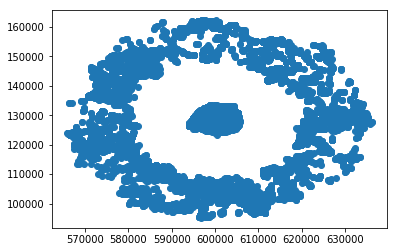

In [168]:
plt.scatter(x, y)
plt.show()

In [171]:
arret_RER = arret[(arret.MOD_RER==1) & (arret.COD_TLB_RES=='801')]
x = []
y = []
for i in range(len(arret_RER)):
    if arret_RER.iloc[i][16] and arret_RER.iloc[i][17]:
        if  not arret_RER.iloc[i][16] == '?':
            temp_x = arret_RER.iloc[i][16].split(",")
            temp_y = arret_RER.iloc[i][17].split(",")
            x.append(float(temp_x[0]))
            y.append(float(temp_y[0]))
len(x)


75

#### A线站点投射到地图上

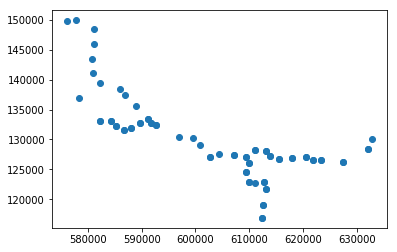

In [156]:
plt.scatter(x, y)
plt.show()

#### 4.  Transporteur dictionnnry

In [70]:
trans = pd.read_csv(path_transporteur, header = 0, delimiter="\t", nrows = 10, encoding ="latin-1")
trans

,COD_TLB_TRNS,COD_GRP_TRNS,COD_ORGN_SOUR,COD_STF_TRNS,LIBL_TRNS
0,189,5,4,350,TVM
1,107,7,4,7,EUROPE AUTOCARS
2,134,3,4,244,C.T.C.O.P.
3,159,2,4,59,STIVO
4,118,8,4,18,TRANSDEV IDF - Brétigny
5,169,7,4,269,T.I.P.S
6,103,7,4,3,N4 Mobilité
7,186,8,4,86,(ex TEL)
8,139,2,4,39,SAVAC
9,120,7,4,20,BIEVRE BUS MOBILITES


#### 5. AFC 

In [51]:
## This step will separate the file to 27 files which is already down by chunksize.
##  AFC = pd.read_csv(path_AFC, header = 0, delimiter="\t", encoding="latin-1", chunksize=5*10**5)

E:\python\lib\site-packages\ipykernel\zmqshell.py:533: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [3]:
AFC = pd.read_csv(path_AFC, header = 0, delimiter="\t", encoding="latin-1")

E:\python\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (5,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
from collections import Counter
counts_id = Counter(AFC['NUMR_CART'])

In [6]:
final_counts_id = Counter(counts_id.values())

In [7]:
final_counts_id

Counter({1: 272716,
         2: 735869,
         3: 464295,
         4: 527189,
         5: 394730,
         6: 281165,
         7: 182688,
         8: 114301,
         9: 68002,
         10: 42432,
         11: 26020,
         12: 16761,
         13: 10658,
         14: 6994,
         15: 4459,
         16: 2939,
         17: 2013,
         18: 1402,
         19: 925,
         20: 569,
         21: 436,
         22: 253,
         23: 185,
         24: 125,
         25: 96,
         26: 71,
         27: 31,
         28: 36,
         29: 29,
         30: 31,
         31: 19,
         32: 26,
         33: 13,
         34: 8,
         35: 5,
         36: 10,
         37: 3,
         38: 2,
         39: 8,
         40: 3,
         41: 6,
         42: 5,
         43: 4,
         44: 1,
         45: 1,
         46: 5,
         47: 4,
         48: 3,
         49: 2,
         50: 1,
         51: 2,
         52: 3,
         53: 3,
         57: 2,
         58: 1,
         60: 1,
         62: 2,


In [14]:
filter_data = {key:value for key,value in final_counts_id.items() if key <= 20}

In [22]:
this_data = 0
all_data = 0
for key,value in filter_data.items():
    all_data += value
    if key <8:
        this_data += value
this_data/all_data

0.9712678210872216

In [17]:
filter_data = {key:value/key for key,value in filter_data.items()}

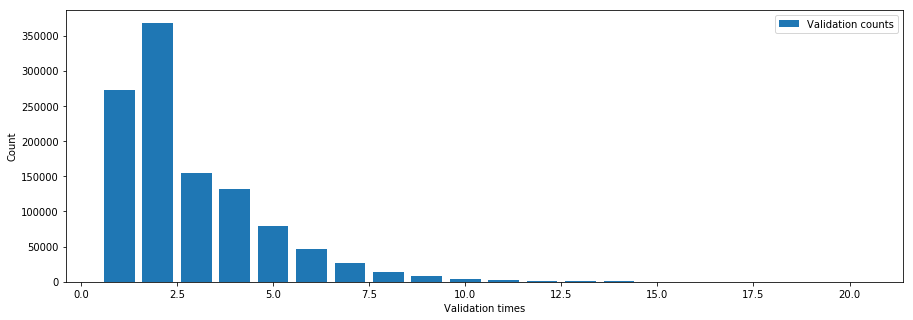

In [18]:
plt.figure(figsize=(15,5))
plt.bar(filter_data.keys(),filter_data.values(),label='Validation counts')
plt.legend(loc='best')
plt.xlabel('Validation times')  
plt.ylabel('Count')
plt.savefig('E:/Study/images/Validation_counts_2')
plt.show()

In [19]:
for filter_data

{1: 272716.0,
 2: 367934.5,
 3: 154765.0,
 4: 131797.25,
 5: 78946.0,
 6: 46860.833333333336,
 7: 26098.285714285714,
 8: 14287.625,
 9: 7555.777777777777,
 10: 4243.2,
 11: 2365.4545454545455,
 12: 1396.75,
 13: 819.8461538461538,
 14: 499.57142857142856,
 15: 297.26666666666665,
 16: 183.6875,
 17: 118.41176470588235,
 18: 77.88888888888889,
 19: 48.68421052631579,
 20: 28.45}

In [3]:
len(AFC)

13099452

In [4]:
AFC.head()

,NUMR_CART,JOUR_EXPL_VALD,HEUR_VALD,Lib_Arret,COD_TLB_TRNS,COD_TLB_RES,COD_TLB_ARRT_STTN,NUMR_BORN_VALD_EQPM,COD_NATR_VALD,COD_MOD_VALD,COD_STF_TRNS,COD_STF_RES,COD_STF_LIGN
0,71842266877239136593,14/03/2017,06:12:58,LES RIGOLLOTS,3,1,0030010118049,14398,11,2,100,100,118
1,01467498965696583231,14/03/2017,08:10:28,BOISSY-SAINT-LEGER,1,801,0030050160802,108,52,1,810,801,ND
2,05555646578518204505,14/03/2017,08:16:32,GARE DE LYON,1,801,0030050091300,214,57,3,810,801,ND
3,26905857762442003788,14/03/2017,07:15:33,NOISY-LE-GRAND-MONT D'EST,1,801,0030050260701,222,52,1,810,801,ND
4,58112168677996473715,14/03/2017,07:03:09,PETIT-VAUX,2,2,393652,1651401,1,1,800,803,ND


In [6]:
from collections import Counter
counts_mod = Counter(AFC['COD_MOD_VALD'])

In [10]:
counts_mod

Counter({-1: 800, 1: 4702130, 2: 3595632, 3: 4243809, 4: 548553, 6: 8528})

In [35]:
from operator import itemgetter
x = sorted(counts_mod.items(), key=itemgetter(1),reverse=True)
this_keys = []
this_values = []
for key,value in x:
    this_keys.append(patterns_keys[key])
    this_values.append(value)

In [27]:
patterns_keys = {-1:'NON DEFINI', 1:'FERRE', 2:'BUS', 3:'METRO',4:'TRAMWAY',6:'TRAMWAY T4'}
counts_patterns = {}

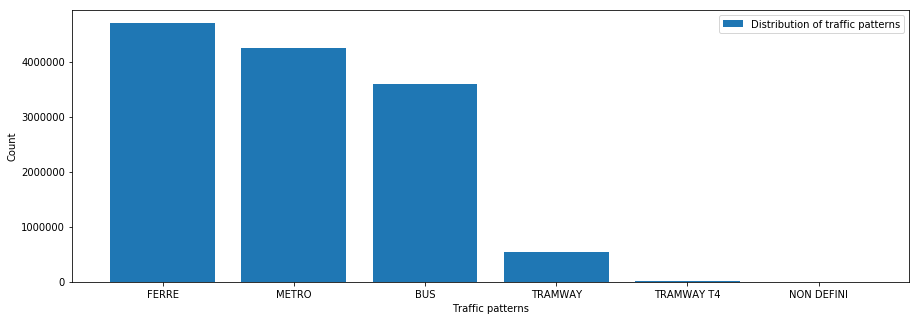

In [37]:
plt.figure(figsize=(15,5))
plt.bar(range(len(this_keys)), this_values,label='Distribution of traffic patterns')
plt.legend(loc='best')
plt.xlabel('Traffic patterns')  
plt.ylabel('Count')
plt.xticks(range(len(this_keys)), this_keys)
plt.savefig('E:/Study/images/Traffic_patterns_bar')
plt.show()

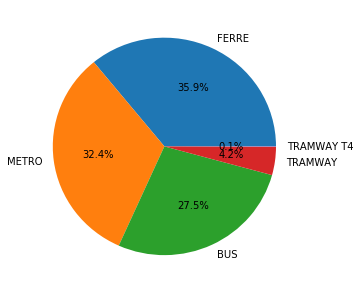

In [44]:
plt.figure(figsize=(5,5))
plt.pie(this_values[:-1],labels=this_keys[:-1],autopct='%1.1f%%')
#plt.legend(loc='best')
plt.savefig('E:/Study/images/Traffic_patterns_pie')
plt.show()

In [68]:
paths =  []
for i in range(1,28):
    paths.append("F:/Stage/data/AFC/parts/part_%d.txt"%i)

'F:/Stage/data/AFC/parts/part_1.txt'

In [172]:
AFC_part_1 = pd.read_csv(paths[0], header = 0, delimiter="\t", encoding="latin-1")
AFC_part_1_RER = AFC_part_1[AFC_part_1.COD_TLB_RES=='801']

E:\python\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [179]:
AFC_part_1_RER

,Unnamed: 0,NUMR_CART,JOUR_EXPL_VALD,HEUR_VALD,Lib_Arret,COD_TLB_TRNS,COD_TLB_RES,COD_TLB_ARRT_STTN,NUMR_BORN_VALD_EQPM,COD_NATR_VALD,COD_MOD_VALD,COD_STF_TRNS,COD_STF_RES,COD_STF_LIGN
131077,131077,88267819529417423085,14/03/2017,19:10:38,CHATELET-LES HALLES,1,801,0030050011000,218,57,3,810,801,ND
131080,131080,72815280770414505297,14/03/2017,07:13:57,POISSY,1,801,386573,20321002,1,1,810,801,ND
131083,131083,39105583468942915967,14/03/2017,17:16:13,CHATELET-LES HALLES,1,801,0030050011000,309,56,1,810,801,ND
131084,131084,54355476570303482250,14/03/2017,17:07:36,GARE DE LYON,1,801,0030050091300,437,51,1,810,801,ND
131085,131085,77990773484140236603,14/03/2017,15:39:59,NANTERRE-PREFECTURE,1,801,0030050170501,306,52,1,810,801,ND
131092,131092,97843684168568483907,14/03/2017,13:29:03,GARE DE LYON,1,801,0030050091300,141,57,3,810,801,ND
131096,131096,78989911759622950069,14/03/2017,09:41:17,GARE DE LYON,1,801,0030050091300,301,56,1,810,801,ND
131098,131098,40935463783446637569,14/03/2017,18:38:29,NATION,1,801,0030050160101,209,56,1,810,801,ND
131100,131100,86837955668568025754,14/03/2017,16:24:57,CHAMPIGNY,1,801,0030050160601,205,51,1,810,801,ND
131101,131101,92987900622370274373,14/03/2017,21:02:50,CHATELET-LES HALLES,1,801,0030050011000,204,57,3,810,801,ND


In [180]:
get_counts(AFC_part_1_RER.loc[:,'COD_NATR_VALD'])

{1: 2068, 2: 2050, 31: 1520, 51: 20736, 52: 19231, 56: 13255, 57: 15299}